# House Price - Regression Task

- Introduce the problem and dataset:
    - Introduce the project, the problem being solved, and details of the dataset (e.g., predicting house prices and details of the Kaggle competition).

- What is regression and how does it work?
    - Explain what regression is and how it works (specifically linear regression, as we have covered it in class OR if you used a different regression model, you may explain that one instead if prefererd). Bonus points for math (up to 5 bonus points for very good explanations).

- Experiment 1: Data understanding
    - Before diving right into the work, what steps do you take to first gain an understanding of your data? For example, are any features correlated with each other? Are there any existing patterns? What visualizations can you make to help gain this initial understanding?

- Experiment 1: Pre-processing
    - After the initial understanding, what steps need to be taken? Do you need to deal with null values? What features are you going to try using for your first experiment and why? Do you need to transform any features (e.g., change from categorical to numerical)? Are you trying to create any new features to use?

- Experiment 1: Modeling
    - Create a linear regression model for your first experiment.
Documentation: https://scikit- learn.org/stable/modules/generated/sklearn.linear_model.Linear Regression.html

- Experiment 1: Evaluation
    - Evaluate your first model. For example, use root mean squared error (RMSE).

- Experiment 2
    - For the next experiment, discuss what you try changing compared to the first experiment. For example, do you want to experiment with different features? Are you trying a different model? Then, talk about your results and how it changes from the previous experiment.
    
- Experiment 3
    - For the next experiment, discuss what you try changing compared to the first experiment. For example, do you want to experiment with different features? Are you trying a different model? Then, talk about your results and how it changes from the previous experiment.

- Impact Section
    - Discuss the possible impact of your project. This can be socially, ethically, etc. It cannot be something like "our project has no impact" or "our project has no negative impact." Even the most well-intentioned projects *could* have a negative impact. We will not be checking for "right" or "wrong" answers, but showing your critical thinking.

- Conclusion
    - Discuss what you have learned from this project and through the different experiments. For example, did certain pre-processing steps help improve the model? Did you try using feature selection, and including/excluding certain features improve performance?

- References
    - Include any references.

- Make sure to include your code. We will need the full notebook file(s) in some way. For example, you can attach it as a file to your website or link to it (through Github, Kaggle, Google Drive, etc.). It may also be useful to include code snippets in your writing for explanation purposes, but we will still need the file, as this can help us check your work.

### Importing Packages

In [220]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [221]:
warnings.filterwarnings('ignore')

### Importing Dataset

- Critical Thinking: Importing training and testing dataset using pandas read_csv function and dropping Id column as we dont need it anymore.

In [222]:
df = pd.read_csv('train.csv').drop('Id',axis=1)
df_test = pd.read_csv('test.csv').drop('Id',axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Introduce the Problem and Dataset
- Introduce the project, the problem being solved, and details of the dataset (e.g., predicting house prices and details of the Kaggle competition).

- Answer:
In this project we are trying to predict the sale price of any house using regression technique, Which will be helpful to us to get the predicted price of the house based on the parameters that we have (eg.LotArea, Street etc.), SalePrice will be our Label column and remaining once will be our Feature columns
- train.csv - the training set
- test.csv - the test set
- Data fields as shown below.

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### What is regression and how does it work?
- Explain what regression is and how it works (specifically linear regression, as we have covered it in class OR if you used a different regression model, you may explain that one instead if prefererd). Bonus points for math (up to 5 bonus points for very good explanations).

- Answer: Regression is a technique of supervised Machine learning, which works on labeled data. It will be used to predict the numerical values (eg. Marks, Price, Temperature, etc.). In our dataset, we have SalesPrice as a label. There are other regression algorithms Machine learning The most popular Machine Learning algorithm for Linear datasets is Linear Regression. 

- How it works: Let us consider the Linear Regression algorithm and it's working so Linear regression fits the data on an Axis then it fits the data onto it then it finds the best-fit line passing through the data points, and their projection points will be the precited points. There are two types of Linear regression algorithms first Simple Linear Regression (There is only One feature and One label) and Multiple Linear Regression (There are multiple features and one label field). In our project we will be training our model on the Linear Regression model afterward we will be checking for the RMSE Score, based on that if it is giving us good accuracy we will keep the linear regression model or else we will search for the different Regression algorithm that is presented in Scikit Learn, (eg. Random Forest Regressor, Decision Tree Regressor Etc.)


### Experiment 1: Data understanding
- Before diving right into the work, what steps do you take to first gain an understanding of your data? For example, are any features correlated with each other? Are there any existing patterns? What visualizations can you make to help gain this initial understanding?

### Columns and their D-Types

- Critical Thinking: Checking the total number of columns and their data type so that we can understand how many features are there in the object data type so that we encode them later.

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Descriptive analysis of Dataset

- Critical Thinking: Checking the Statistics amongs the numerical features so that we can check the mean, std, min, max etc.

In [225]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Checking for the Missing Values

- Critical Thinking: Let us check for the null values so that we can handle it later, so we dont get any errors while building Machine Learning model.

In [226]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

### N-Unique values in Dataset

- Critical Thinking: we are checking for the unique values presented inside each feature so that we can drop the features which have high number of unique values as they cannot give us the more information about the dataset and doesnt find more useful patterns for our Machine Learning model.

In [227]:
df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 80, dtype: int64

### Checking for the outliers

- Critical Thinking: checking for the outliers whether any feature has any value that is more different from others as we can see features no.37 & no.3 have few outliers but we are not dropping them because we have few amount of data so if we drop them the data will get reduced.

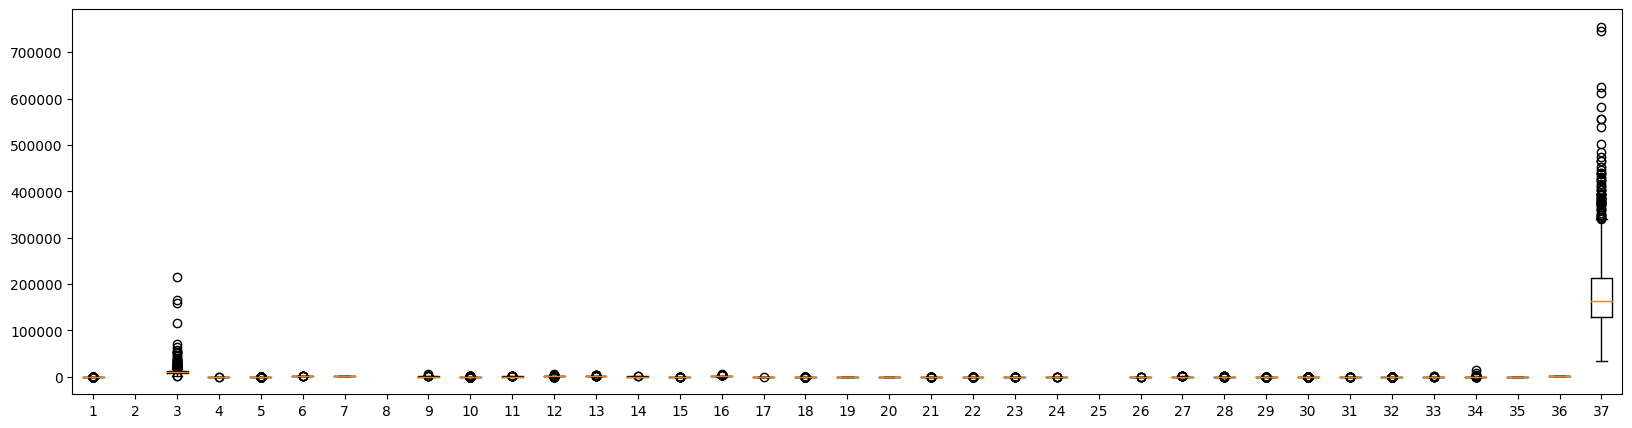

In [228]:
plt.figure(figsize=(20,5))
numerical_cols = df.select_dtypes(['int64','float64']).columns
plt.boxplot(df[numerical_cols])
plt.show()

### Object columns in Dataset

In [229]:
object_cols = df.select_dtypes('object').columns

### Value counts for Object columns

- Critical Thinking: we are checking for the value count in object features so that we can see whether we have imbalanced categorical values in any particular feature or not, imbalanced categorical features are likely to be dropped but we are keeping them so that our data not be reduced.

In [230]:
for cols in object_cols:
    print(df[cols].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

### Correlation Matrix
- Corrlation matrix shows that, with respect to SalePrice. OverallQual, GrLivArea, GarageCars these features are likely to high correlated with the SalePrice. 

In [231]:
corr_matrix = df.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

### Selecting Features from the Correlation Matrix

- Critical Thinking: Keeping top 15 and bottom 15 features which are positvely and negatively correalted with our target column so that we can reduce the dimensionality of our data.

In [232]:
selected_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
    'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
    'EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'OverallCond', 'YrSold',
    'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', '3SsnPorch',
    'MoSold', 'PoolArea', 'ScreenPorch','SalePrice'
]

df = df[selected_features]
selected_features.pop()
df_test = df_test[selected_features]

### Pair Plot
- As we have taken the top 5 highly correlated columns and plotting the Pair plot amongs them.

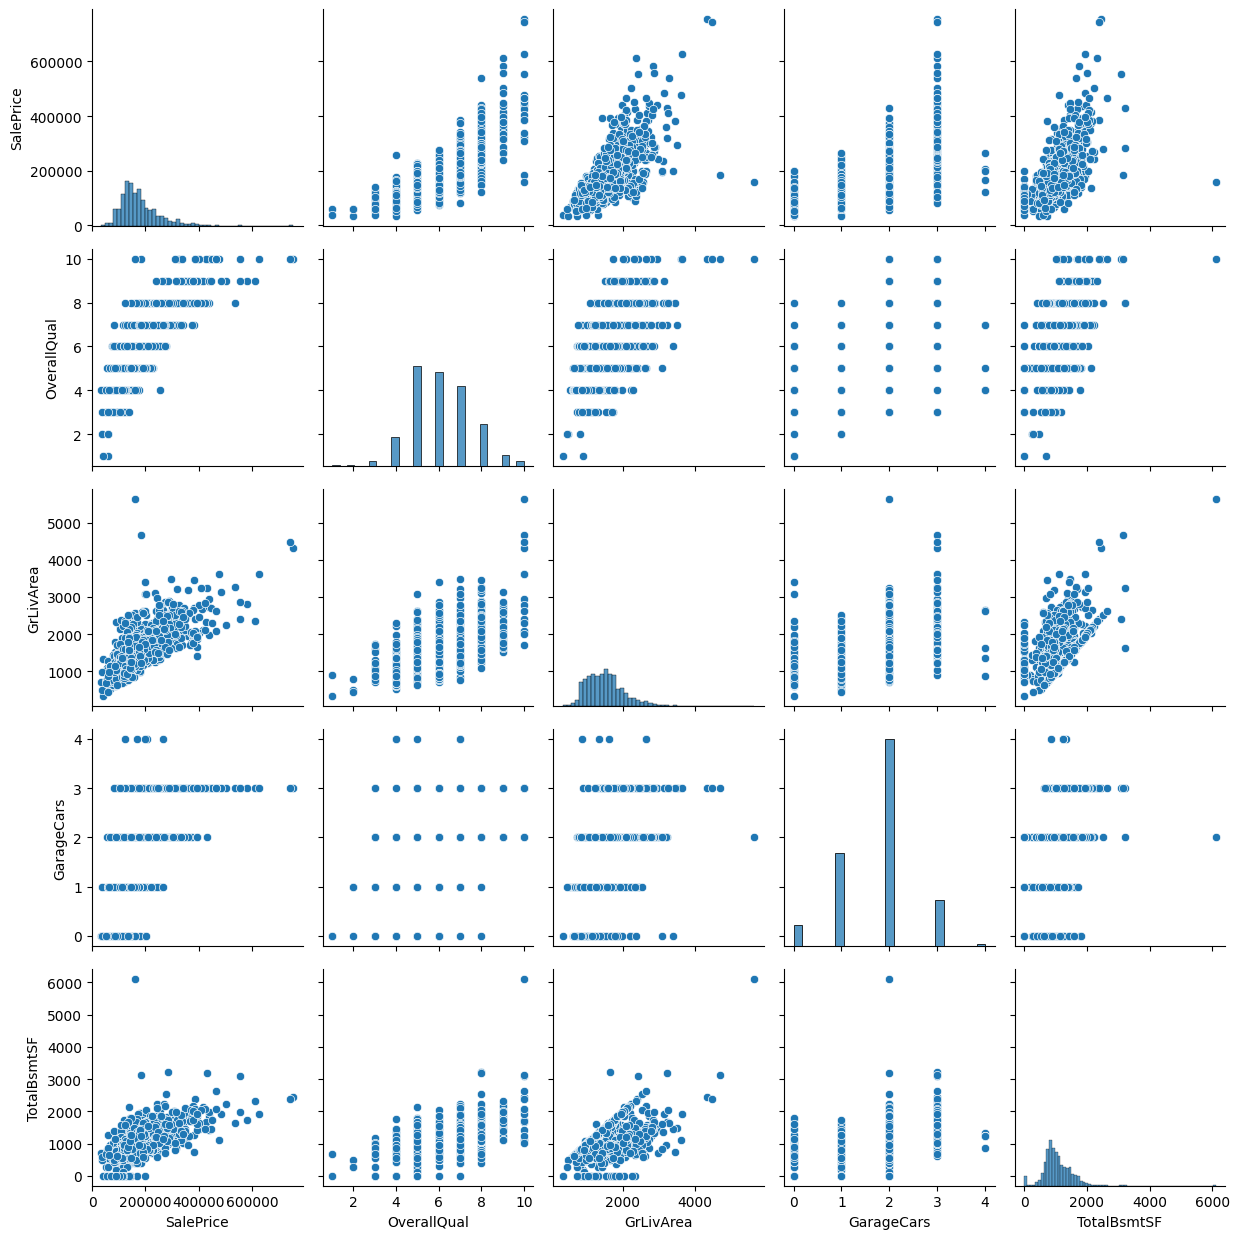

In [233]:
sns.pairplot(df, vars=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF'])
plt.tight_layout()
plt.show()

### Histogram of Sale Price
- Below historgram shows that we have plenty of house instances in the price range of 100000-300000 and ranges goes upto 0-175.

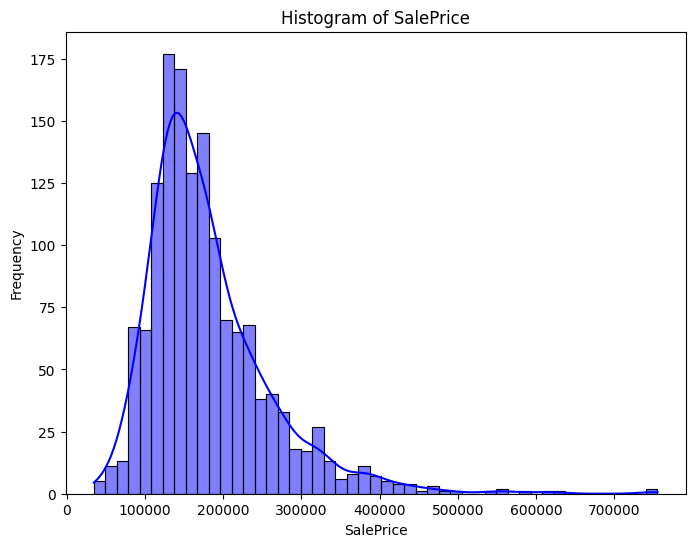

In [234]:
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True, color='blue')
plt.title("Histogram of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

### Boxplot of SalePrice by OverallQual

- Critical Thinking: we are plotting box plot on X overallqual and y saleprice, which can gives us the 25, 50, 75 and 100 percent house saleprice at each OverallQual from 0 to 10.

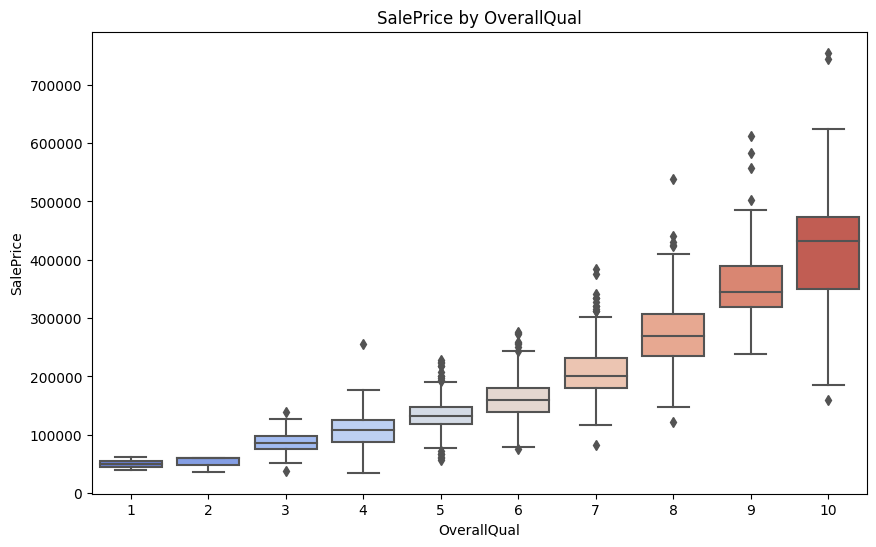

In [235]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='coolwarm')
plt.title("SalePrice by OverallQual")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

### Scatter plot of GrLivArea vs SalePrice
- As below scatter plot describes that if GrLivArea increasing then SalePrice is also increasing these two features are positively correlated with eachother.

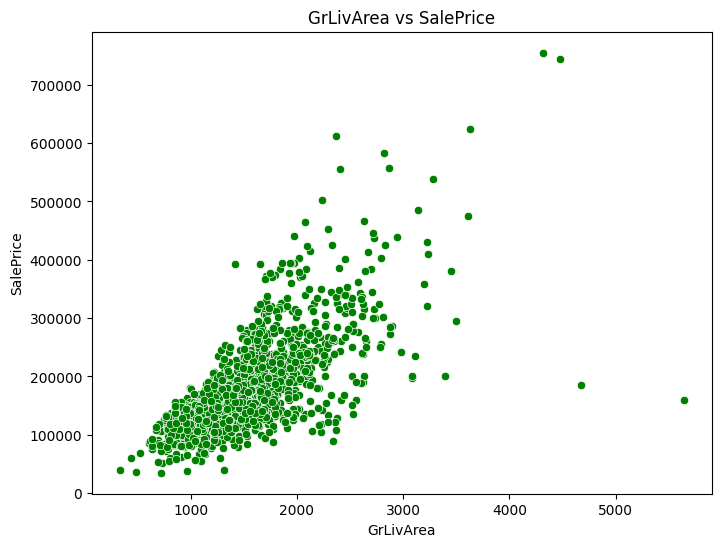

In [236]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, color='green')
plt.title("GrLivArea vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

### Scatter plot of GarageArea vs SalePrice
- GarageArea and SalePrice these two columns are also potively correlated with eachother.

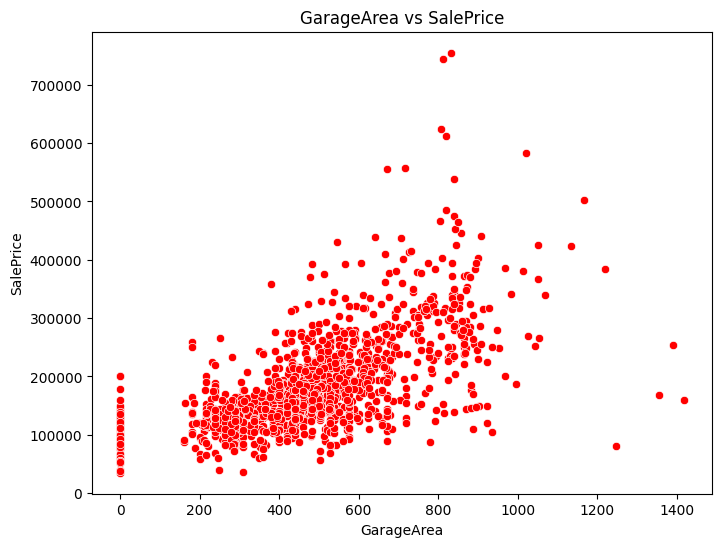

In [237]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GarageArea', y='SalePrice', data=df, color='red')
plt.title("GarageArea vs SalePrice")
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show()

### Experiment 1: Pre-processing
- After the initial understanding, what steps need to be taken? Do you need to deal with null values? What features are you going to try using for your first experiment and why? Do you need to transform any features (e.g., change from categorical to numerical)? Are you trying to create any new features to use?

### N-Unique values of Object columns

In [238]:
for cols in df.select_dtypes('object').columns:
    print(cols,df[cols].nunique())

### Splitting Training set into Features and Lables
- Critical Thinking: Spitting our data into feature and label so that we can apply the preprocessing on training data.

In [239]:
X_train = df.drop('SalePrice',axis=1)
y_train = df[['SalePrice']]

### Splitting Testing set into Features and Lables
- Critical Thinking: Copying the data and storing into X_test, we will preprocess it later.

In [240]:
X_test = df_test.copy()

### Pipeline for Data Preprocessing

- Critical Thinking: The reason behind creating a preparation pipeline is that we have two files train.csv and test.csv so for both files we cannot repeat the preprocessing code for both files, so we are creating 2 pipelines 1st for the numerical pipeline which will be handling the numerical features and it will apply the Scaling of data and finding missing value inside the data the strategy that we are using to find the missing value is median. another pipeline that we have created is for categorical features, we are finding the missing values using the most_frequent strategy inside the object features and then we encode them using an Ordinal Encoder. At last, we are merging two preparation pipelines in one column transformer and we will be applying it on X_train and X_test.

In [241]:
# Data Preparation Pipeline for Numerical Columns
numerical_features = X_train.select_dtypes(['int64','float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

# Data Preparation Pipeline for Categorical Columns
categorical_features = X_train.select_dtypes('object').columns
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder())
])

# Column Transformer
preprocessor = ColumnTransformer(transformers=[
    ('cat',categorical_transformer,categorical_features),
    ('num',numerical_transformer,numerical_features)
])

### Applying Prepration Pipeline on Training set

In [242]:
X_train_processed = preprocessor.fit_transform(X_train)
X_train_processed = pd.DataFrame(X_train_processed,columns=X_train.columns)

In [243]:
X_train_processed.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,OverallCond,YrSold,BsmtFinSF2,BsmtHalfBath,MiscVal,LowQualFinSF,3SsnPorch,MoSold,PoolArea,ScreenPorch
0,0.651479,0.370333,0.311725,0.351000,-0.459303,-0.793434,0.789741,0.912210,1.050994,0.878668,...,-0.517200,0.138777,-0.288653,-0.241061,-0.087688,-0.120242,-0.116339,-1.599111,-0.068692,-0.270208
1,-0.071836,-0.482512,0.311725,-0.060731,0.466465,0.257140,0.789741,-0.318683,0.156734,-0.429577,...,2.179628,-0.614439,-0.288653,3.948809,-0.087688,-0.120242,-0.116339,-0.489110,-0.068692,-0.270208
2,0.651479,0.515013,0.311725,0.631726,-0.313369,-0.627826,0.789741,-0.318683,0.984752,0.830215,...,-0.517200,0.138777,-0.288653,-0.241061,-0.087688,-0.120242,-0.116339,0.990891,-0.068692,-0.270208
3,0.651479,0.383659,1.650307,0.790804,-0.687324,-0.521734,-1.026041,0.296763,-1.863632,-0.720298,...,-0.517200,-1.367655,-0.288653,-0.241061,-0.087688,-0.120242,-0.116339,-1.599111,-0.068692,-0.270208
4,1.374795,1.299326,1.650307,1.698485,0.199680,-0.045611,0.789741,1.527656,0.951632,0.733308,...,-0.517200,0.138777,-0.288653,-0.241061,-0.087688,-0.120242,-0.116339,2.100892,-0.068692,-0.270208


### Applying Prepration Pipeline on Testing set

In [244]:
X_test_processed = preprocessor.fit_transform(X_test)
X_test_processed = pd.DataFrame(X_test_processed,columns=df_test.columns)

In [245]:
X_test_processed.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,OverallCond,YrSold,BsmtFinSF2,BsmtHalfBath,MiscVal,LowQualFinSF,3SsnPorch,MoSold,PoolArea,ScreenPorch
0,-0.751101,-1.215588,-0.988189,1.185921,-0.370716,-0.654561,-1.028720,-0.918335,-0.340945,-1.072885,...,0.400766,1.713905,0.517537,-0.25816,-0.092244,-0.080483,-0.088827,-0.038281,-0.057227,1.818960
1,-0.054877,-0.323539,-0.988189,-0.741235,0.639230,0.433298,-1.028720,-0.255371,-0.439695,-1.214908,...,0.400766,1.713905,-0.297689,-0.25816,19.730438,-0.080483,-0.088827,-0.038281,-0.057227,-0.301543
2,-0.751101,0.294508,0.301406,0.042537,-0.266784,-0.574165,0.773083,-0.255371,0.844059,0.678742,...,-0.497418,1.713905,-0.297689,-0.25816,-0.092244,-0.080483,-0.088827,-1.140614,-0.057227,-0.301543
3,-0.054877,0.243004,0.301406,-0.012788,-0.271303,-0.579190,0.773083,0.407593,0.876976,0.678742,...,0.400766,1.713905,-0.297689,-0.25816,-0.092244,-0.080483,-0.088827,-0.038281,-0.057227,-0.301543
4,1.337571,-0.424487,0.301406,0.153187,0.528520,0.310192,0.773083,-0.918335,0.679475,0.394694,...,-0.497418,1.713905,-0.297689,-0.25816,-0.092244,-0.080483,-0.088827,-1.875504,-0.057227,2.243060


In [246]:
print(X_train_processed.shape, X_test_processed.shape)
print(y_train.shape)

(1460, 28) (1459, 28)
(1460, 1)


### Experiment 1: Modeling
- Create a linear regression model for your first experiment.
- Critical Thinking: I have built the LinearRegression as my first model and taking hyperparameter normalize=True which I have taken from the internet.

In [247]:
lin_reg = LinearRegression(normalize=True)

### Experiment 1: Evaluation
- Evaluate your first model. For example, use root mean squared error (RMSE).
- Critical Thinking: The reason behind using cross_val_score is to get the accurate RMSE score on different Folds of the Training set and Testing set for 5 the five iterations, we are using soring as neg_mean_squared_error and then we are taking root of it using np.sqrt with - sign so that we will get positive RMSE.

In [248]:
lin_reg_score = cross_val_score(lin_reg,X_train_processed,y_train,cv=5,scoring='neg_mean_squared_error')
lin_reg_RMSE = np.sqrt(-lin_reg_score)
print(lin_reg_RMSE)

[30572.88570973 36082.41768242 37967.97503458 30434.94426501
 49332.20531696]


### Experiment 2
- For the next experiment, discuss what you try changing compared to the first experiment. For example, do you want to experiment with different features? Are you trying a different model? Then, talk about your results and how it changes from the previous experiment.

- Critical Thinking: Applying another model which is RandomForestRegressor as per the internet Random forest regressor is widely used to train an accurate model, which built the different decision stumps on various of the estimator, if n_estimator=100 so that 100 different decision trees will be used to train the random forest regressor and so one other hyperparameters are taken from the internet.

In [249]:
forest_reg = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt')

### Experiment 2: Evaluation
- Evaluate your second model. For example, use root mean squared error (RMSE).
- Critical Thinking: As same as above

In [253]:
forest_score = cross_val_score(forest_reg,X_train_processed,y_train,cv=5,scoring='neg_mean_squared_error')
forest_RMSE = np.sqrt(-forest_score)
print(forest_reg.__class__.__name__,forest_RMSE)

RandomForestRegressor [26538.3380018  34064.24965492 33455.68773971 23735.72149295
 37066.20884046]


### Experiment 3
- For the next experiment, discuss what you try changing compared to the first experiment. For example, do you want to experiment with different features? Are you trying a different model? Then, talk about your results and how it changes from the previous experiment.

- Critical Thinking: we are building DecisionTreeRegressor on a max_depth of 10 and with min_samples_leaf=2 and so one other parameters have taken from the internet.

In [254]:
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt')

### Experiment 3: Evaluation
- Evaluate your third model. For example, use root mean squared error (RMSE).
- Critical Thinking: As same as above.

In [256]:
tree_score = cross_val_score(tree_reg,X_train_processed,y_train,cv=5,scoring='neg_mean_squared_error')
tree_RMSE = np.sqrt(-tree_score)
print(tree_reg.__class__.__name__,tree_RMSE)

DecisionTreeRegressor [40061.51648509 40543.12719824 44150.77177903 35783.64153154
 54740.68653822]


### Impact Section
- Discuss the possible impact of your project. This can be socially, ethically, etc. It cannot be something like "our project has no impact" or "our project has no negative impact." Even the most well-intentioned projects could have a negative impact. We will not be checking for "right" or "wrong" answers, but showing your critical thinking.

- Answer: The impact of our project could help predict house prices, in different cities, regions, or countries. It can be converted into a web app using Streamlit and then we could make this project live for end users so that they can fill out the information related to the home they are looking for and then they can see the predicted price of their house, Socially one wrong impact could be less amount of dataset and historical dataset as house prices change day by day so the dataset has to be updated regularly so that we can get the actual price of our house along with that data has to be accurate so that end user can get their predicted values accurately.

### Conclusion
- Discuss what you have learned from this project and through the different experiments. For example, did certain pre-processing steps help improve the model? Did you try using feature selection, and including/excluding certain features improve performance?

- Answer: I have learned how we can build a linear regression model using the Scikit learn library, along with that just because there are two files train.csv and test.csv I learned a new thing, which is called a Pipeline in Machine Learning so we are preparing pipeline and then applying fit_transform method on both the files train and testing. The number of features that we have is 80 features but, the number of instances is very low so just because we have 80 features and for each feature, we have only ~1400 instances which is quite less, we cannot build a good machine learning model on these few instances. 

- I have applied the correlation matrix and I have taken the top 10 Positive-Negative features, So that we can select the top most important features and we can drop the remaining features which could help us to decrease the RMSE score. 

- Along with that I applied Ordinal Encoder to convert the Categorical values to Numerical Values, and then I used SimpleImputer to find the missing values, for the categorical value I used the most_frequent strategy, and for the numerical value, I used median as a strategy for SimpleImputer, to scale the data I have applied StandardScaler to scale the data which can prevent the overfitting of the model. 

- The First model that I built was Linear Regression the RMSE quite bad for it [30572.88570973 36082.41768242 37967.97503458 30434.94426501 49332.20531696], as we have only a few instances on a high number of features so that we can see the low accuracy in our Machine Learning model.

- As same as above I have built other two models, 2nd the random Forest Regressor and 3rd Decision Tree Regressor. I have applied default hyperparameters for both models, which I have taken from the internet and still, the RMSE for both the models is quite high as same as above we have less number of instances in a high number of features so we could see less accurate Machine Learning model.

### References
- Include any references.
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html 